In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv("Housing_Price_Data.csv")

In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Display basic information about the dataset

In [10]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

# Check for missing values

In [25]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [26]:
df.replace({'yes': 1, 'no': 0}, inplace=True)

In [27]:
df = pd.get_dummies(df, drop_first=True)


# Visualizing dataset

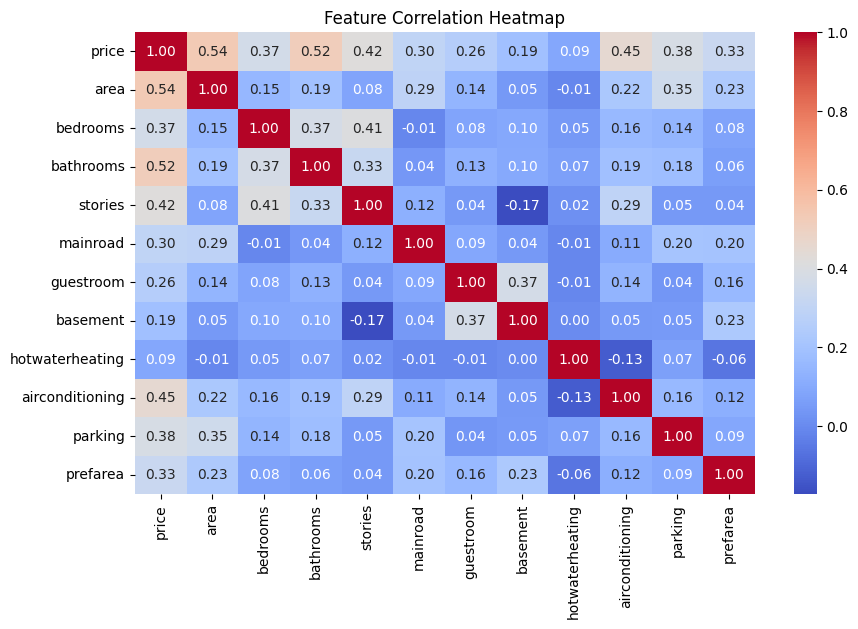

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Histogram of all numeric features

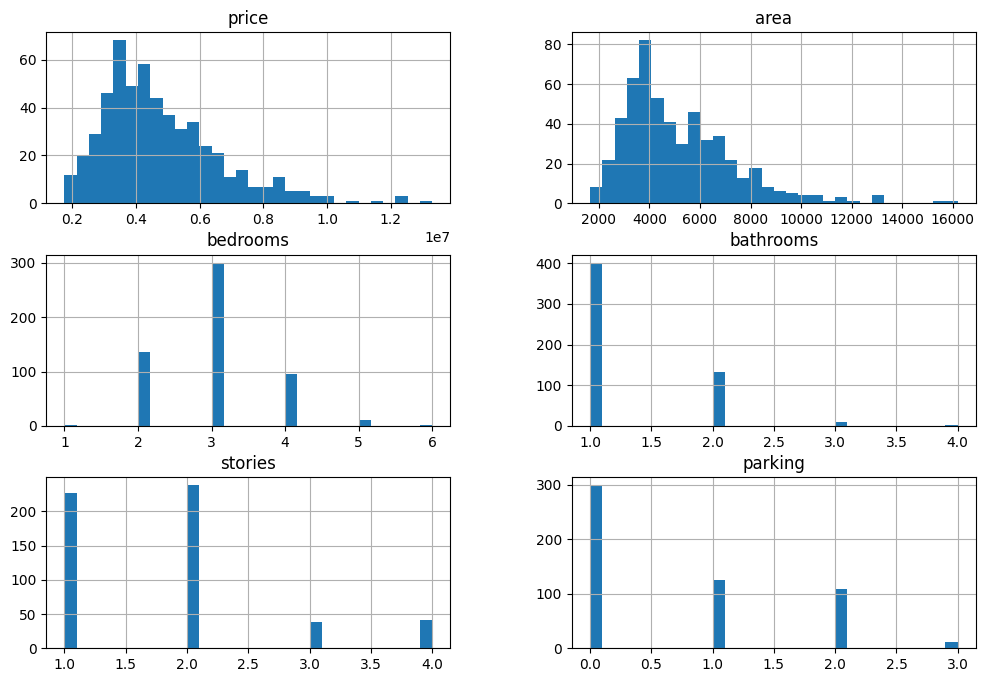

In [13]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplot to identify outliers

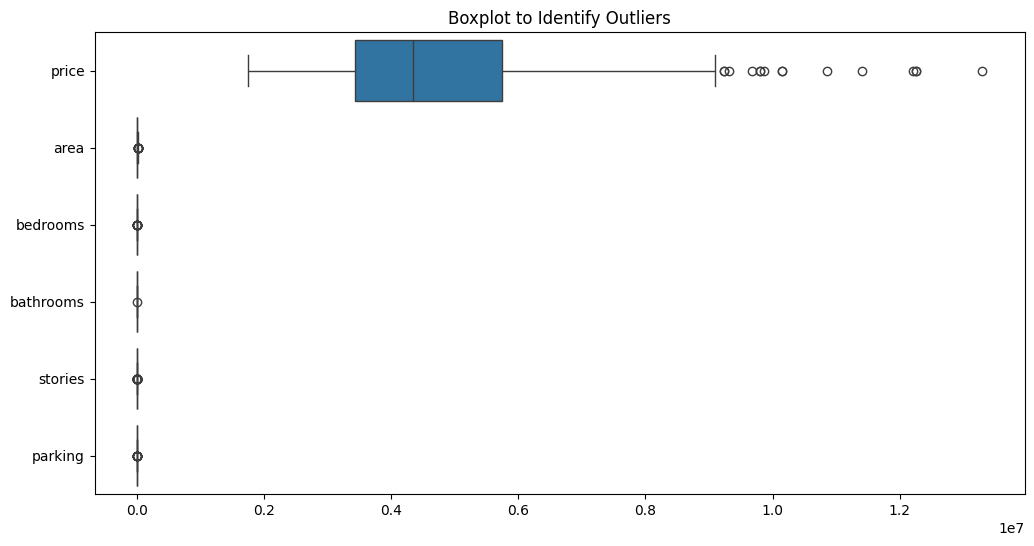

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot to Identify Outliers")
plt.show()


# Detecting outliers using IQR

In [34]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

print("\nNumber of outliers per column:")
print(outliers.sum())



Number of outliers per column:
price               15
area                12
bedrooms            12
bathrooms            1
stories             41
mainroad            77
guestroom           97
basement             0
hotwaterheating     25
airconditioning      0
parking             12
prefarea           128
dtype: int64


# Splitting dataset into train (80%) and test (20%)

In [18]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", train_set.shape)
print("Test Set Shape:", test_set.shape)



Training Set Shape: (436, 13)
Test Set Shape: (109, 13)


# Save train and test set

In [20]:
train_set.to_csv("train_data.csv", index=False)
test_set.to_csv("test_data.csv", index=False)
